## Trabajo semanal 3

# **Análisis de Fourier: FFT, desparramo, interpolación y ventaneo**

**Federico Dunel**

## **Introducción**

En el siguiente trabajo se evaluaron la energía y la potencia de 3 señales senoidales de distintas maneras. La primer señal con una frecuencia de     N/4*(fs/N), N siendo la cantidad de muestras, fs la frecuencia de muestreo y el cociente entre estas dos, la distancia entre las N muestras que se obtendran de su transformacion de Fourier. La frecuencia de las otras dos es este valor pero sumandole 0.25Hz en el segundo caso y 0.5Hz en el tercero. Primero se graficó la Densidad Espectral de Potencia (DEP) de cada señal, definida por la formula:
$$\text{DEP}[k] = \frac{\left| X[k] \right|^{2}}{N\,f_{s}}$$

Siendo X[k] la transformada de Fourier de las funciones. Luego se repitió el experimento pero aplicando la técnica del zero padding para conseguir mejor resolucion. Esta consiste en agregar un vector con una cantidad determinada de ceros a nuestras funciones senoidales, esto aumenta las muestras que son tomadas de la FFT a la cantidad total de celdas del vector ya con padding, y todas estas se aplican sobre la parte no nula.

Por último se verificó la potencia unitaria de las funciones utilizando la Identidad de Parseval definida de la siguiente manera:
$$\frac{1}{N}\sum_{n=0}^{N-1} \left|x[n]\right|^{2}\;=\;\frac{1}{N^{2}}\sum_{k=0}^{N-1} \left|X[k]\right|^{2}$$

## **Analisis de resultados**

Las funciones utilizadas fueron las siguientes:

In [2]:

from numpy.fft import fft
from scipy import signal as win
import numpy as np
import matplotlib.pyplot as plt



def funsen(ff,nn,fs=2,amp=1,dc=0,ph=0): 
    n=np.arange(nn)
    t=n/fs
    x= dc + amp*np.sin(2*np.pi*ff*t+ph)
    
    
    return t,x

n=1000
fs=n
df=fs/n
ts=1/fs

t1,x1=funsen(ff=(n/4)*df,nn=n,fs=fs)
t2,x2=funsen(ff=((n/4)+0.25)*df,nn=n,fs=fs)
t3,x3=funsen(ff=((n/4)+0.5)*df,nn=n,fs=fs)

#FFTs

X1=fft(x1)
X1abs=np.abs(X1)
DEPX1= (X1abs**2)/(n*fs)
X1ang=np.angle(X1)

X2=fft(x2)
X2abs=np.abs(X2)
DEPX2= (X2abs**2)/(n*fs)
X2ang=np.angle(X2)

X3=fft(x3)
X3abs=np.abs(X3)
DEPX3= (X3abs**2)/(n*fs)
X3ang=np.angle(X3)


frec=np.arange(n)*df

**1)** Las funciones x1, x2 y x3 son las señales senoidales de frecuencia (N/4)*df, (N/4)*df + 0.25, (N/4)*df + 0.5 respectivamente. Las transformaciones de Fourier de las funciones se obtuvieron mediante la funcion de numpy de FFT. Con la transformada se sacó la Densidad Espectral de Potencia y luego se graficó en funcion de la frecuencia. Se limitaron los valores del eje x (frecuencia) más centrados entre N/4 para que se aprecie mejor la forma del pico de potencia.

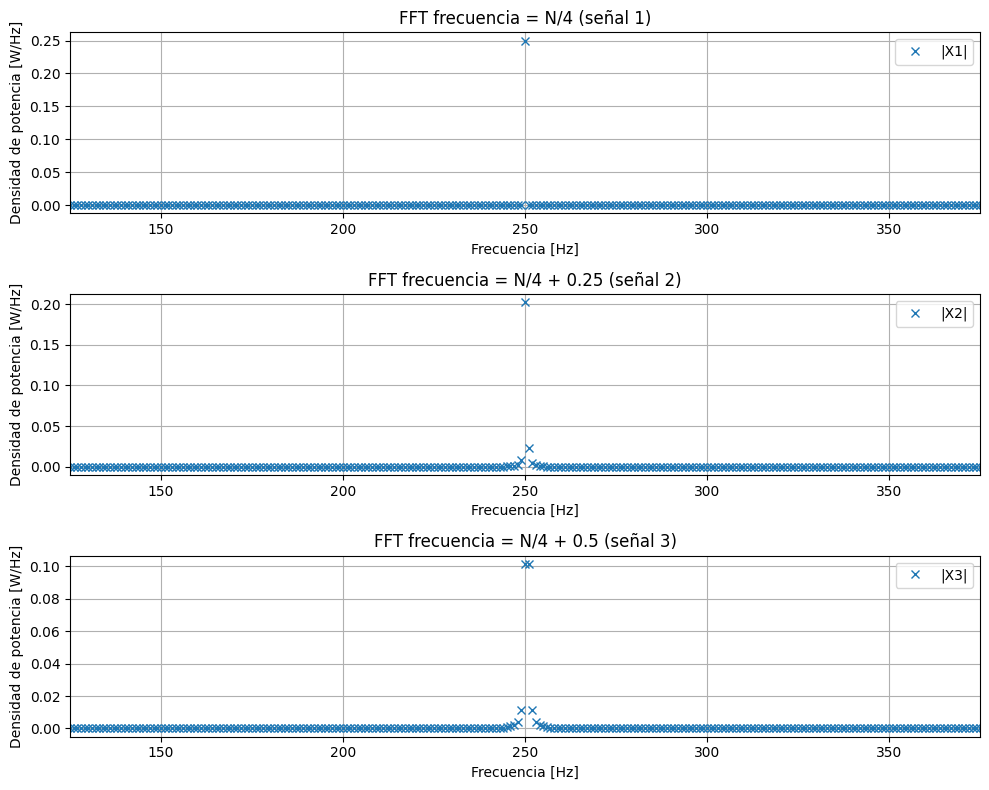

In [3]:

plt.figure(1, figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(frec, DEPX1, 'x', label='|X1|')
plt.xlim([(1/8)*fs, (3/8)*fs])
plt.title('FFT frecuencia = N/4 (señal 1)')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad de potencia [W/Hz]")
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(frec, DEPX2, 'x', label='|X2|')
plt.xlim([(1/8)*fs, (3/8)*fs])
plt.title('FFT frecuencia = N/4 + 0.25 (señal 2)')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad de potencia [W/Hz]")
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(frec, DEPX3, 'x', label='|X3|')
plt.xlim([(1/8)*fs, (3/8)*fs])
plt.title('FFT frecuencia = N/4 + 0.5 (señal 3)')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad de potencia [W/Hz]")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Se puede apreciar como en el primer paso, el pico de potencia coincide con uno de los puntos donde se realiza el muestreo de la función, el resto valen todos 0. En el segundo y terccer caso, no se grafica el pico porque este no se encuentra en un punto que corresponda a algún valor de N*df siendo N un valor entero entre 0 y 999. Entonces lo que se puede visualizar son los puntos intermedios entre los picos.

**2)** Para visualizar mejor el Espectro de potencia se utilizó la técnica de zero padding en la funcion x3 (probando también que si tiene picos, solo que no coincidieron con las muestras que se toman)


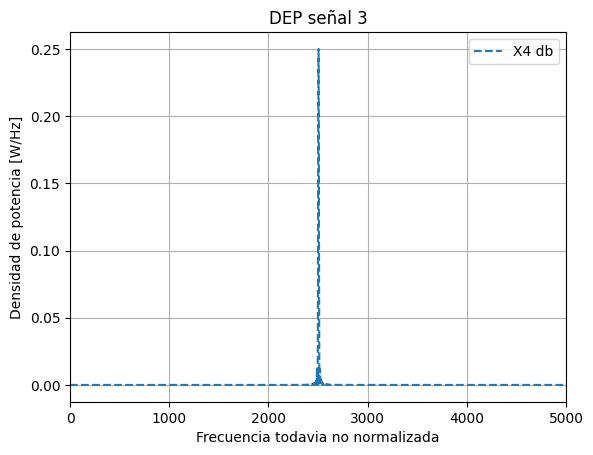

In [4]:
padding = np.zeros(10*n)
padding[0:n] = x3

X4=fft(padding)
X4abs=np.abs(X4)
DEPX4= (X4abs**2)/(n*fs)
X4ang=np.angle(padding)

frec2=np.arange(10 * n) * df

plt.figure(2)
plt.plot(frec2, DEPX4, '--' , label='X4 db')
plt.title('DEP señal 3')

plt.xlabel("Frecuencia todavia no normalizada")

plt.ylabel("Densidad de potencia [W/Hz]")

plt.legend()
plt.xlim([0,(fs/2)*10])
plt.grid()
plt.show()

Limitando el eje X para apreciar mejor la forma de sinc del gráfico de las 3 señales queda de esta manera:

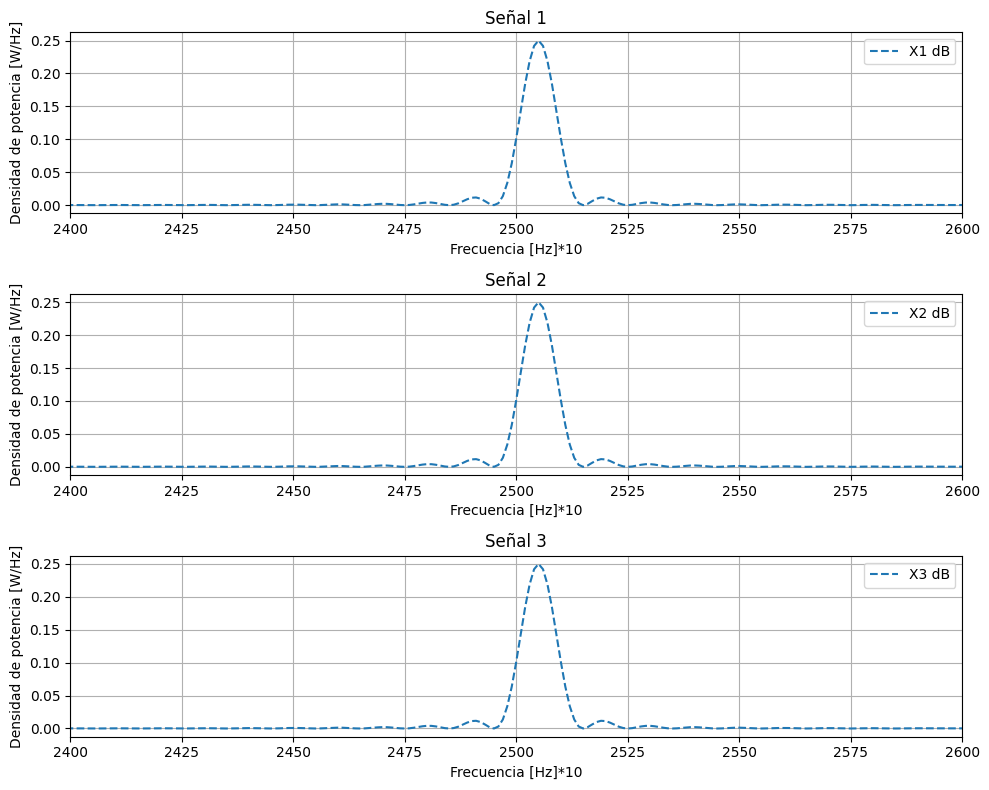

In [5]:
padding_x1 = np.zeros(10*n)
padding_x1[0:n] = x1

XX1=fft(padding)
XX1abs=np.abs(XX1)
DEPXX1= (XX1abs**2)/(n*fs)
XX2ang=np.angle(padding)


padding_x2 = np.zeros(10*n)
padding_x2[0:n] = x2

XX2=fft(padding)
XX2abs=np.abs(XX2)
DEPXX2= (XX2abs**2)/(n*fs)
XX2ang=np.angle(padding)

padding_x3 = np.zeros(10*n)
padding_x3[0:n] = x3

XX3=fft(padding)
XX3abs=np.abs(XX3)
DEPXX3= (XX3abs**2)/(n*fs)
XX3ang=np.angle(padding)

frec2=np.arange(10 * n) * df

#grafico
plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(frec2, DEPXX1, '--', label='X1 dB')
plt.xlim([2400,2600])
plt.title('Señal 1')
plt.xlabel("Frecuencia [Hz]*10")
plt.ylabel("Densidad de potencia [W/Hz]")
plt.grid()
plt.legend()

plt.subplot(3,1,2)
plt.plot(frec2, DEPXX2, '--', label='X2 dB')
plt.xlim([2400,2600])
plt.title('Señal 2')
plt.xlabel("Frecuencia [Hz]*10")
plt.ylabel("Densidad de potencia [W/Hz]")
plt.grid()
plt.legend()

plt.subplot(3,1,3)
plt.plot(frec2, DEPXX3, '--', label='X3 dB')
plt.xlim([2400,2600])
plt.title('Señal 3')
plt.xlabel("Frecuencia [Hz]*10")
plt.ylabel("Densidad de potencia [W/Hz]")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**3)** Por último se verificó mediante la identidad de Parseval 

In [9]:
potencia_unitaria_DEP1 =  np.sum(DEPX1)
potencia_señal1 = (1/n) * np.sum(x1**2)

print("Potencia en el tiempo señal 1:", potencia_señal1)
print("Potencia unitaria del DEP señal 1:", potencia_unitaria_DEP1)

potencia_unitaria_DEP2 =  np.sum(DEPX2)
potencia_señal2 = (1/n) * np.sum(x2**2)

print("Potencia en el tiempo señal 2:", potencia_señal2)
print("Potencia unitaria del DEP señal 2:", potencia_unitaria_DEP2)

potencia_unitaria_DEP3 =  np.sum(DEPX3)
potencia_señal3 = (1/n) * np.sum(x3**2)

print("Potencia en el tiempo señal 3:", potencia_señal3)
print("Potencia unitaria del DEP señal 3:", potencia_unitaria_DEP3)

Potencia en el tiempo señal 1: 0.5
Potencia unitaria del DEP señal 1: 0.5
Potencia en el tiempo señal 2: 0.4994999999999998
Potencia unitaria del DEP señal 2: 0.49949999999999983
Potencia en el tiempo señal 3: 0.5000000000000001
Potencia unitaria del DEP señal 3: 0.5000000000000002


Se pueden apreciar resultados casi identicos, verificando que la suma de todos los valores del DEP dan como resultado la potencia unitaria de una señal.
## **Conclusiones**

Se pudo apreciar como cambia la lectura de la funcion dependiendo del muestreo de la misma y de la ventana que se utiliza para evaluar. Se vió una técnica para aumentar la resolución de la transformación y luego se probaron las magnitudes que devuelven las transformadas y la DEP. 

## Analisis del aprendizaje
No use chatgpt más q para ordenar los gráficos, pude llegar a los resultados esperados en base a lo que hicimos en clase.